# Lab 1 - Python Review with Time Domain Filtering

## Jordan White

Instructor: Prof. Amy Orsborn

Teaching Assistant: Christopher Yin

Notebook originally provided by Felix Schwock.

**Team Members:**

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import scipy.signal
from scipy import *
import copy
import pylab as pl
from scipy import signal
import time as t
from IPython import display

# 1) Implementing Discrete Time Filters to Filter Time-Series Data

In this part, we will be looking at various discrete time filters and how they are used to make more sense of time-series data. These are very common, basic and helpful operations that one encounters in anything related to signal processing.

## Implementing a Mean Filter

The time window size used was  2961 ms


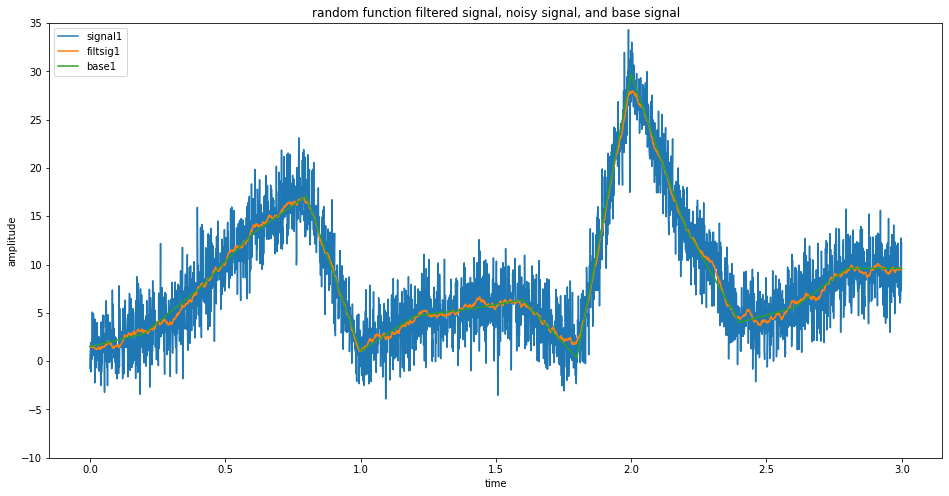

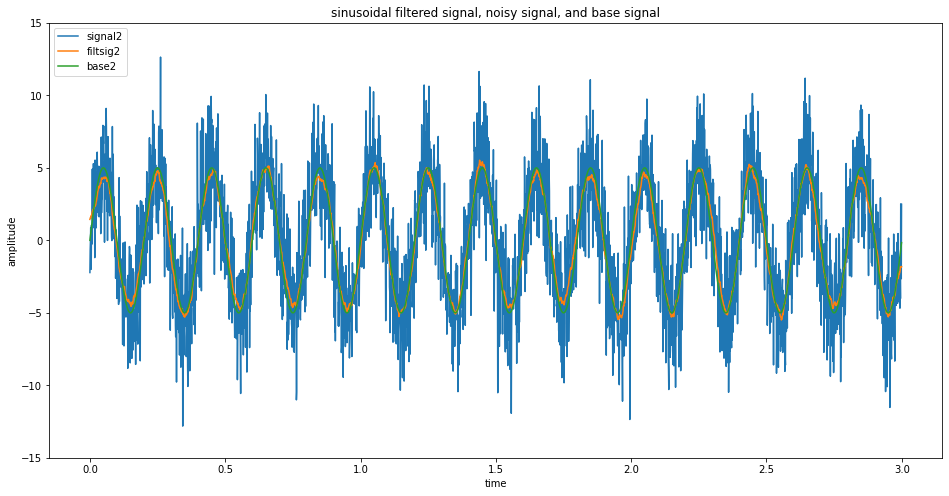

In [24]:
# choose relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,3,1/srate) # associated time vector that corresponds to 3 seconds
n     = len(time) # length of the time vector
p     = 15 # poles for random interpolation
pi = np.pi # value of pi
sigamp = 30 # amplitude of signal
k = 20 # k value used for running mean filter

# here are some base signals to work with
base1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*sigamp)
base2 = 5*np.sin(2*pi*5*time)

# create some random noise to be added to the above base signals

### TODO: create some random noise ###
noise  = 2.5 * np.random.randn(n)

# add noise to the base signals to create new noisy signals
signal1 = np.add(base1, noise)
signal2 = np.add(base2, noise)

# implement the running mean filter

filtsig1 = np.zeros(n) # initialize filtered signal vector for signal 1
filtsig2 = np.zeros(n) # initialize filtered signal vector for signal 2

### TODO: finish your implementation of the running mean filter ###
iterate = len(signal1)
for t in range(iterate):
    if (t < 20):
        filtsig1[t] = np.mean(signal1[0:t+k])
        filtsig2[t] = np.mean(signal2[0:t+k])
    elif (t >= 20 and t <= len(signal1)-k-1):
        filtsig1[t] = np.mean(signal1[t-k:t+k])
        filtsig2[t] = np.mean(signal2[t-k:t+k])
    else:
        filtsig1[t] = np.mean(signal1[t-k:len(signal1)])
        filtsig2[t] = np.mean(signal2[t-k:len(signal2)])

# compute the time window size in ms and print it

### TODO: compute the duration of the time-window that slides across the signal in ms ###
windowsize = n-2*k+1 # length of the time vector minus the double of the k value (edges)
print("The time window size used was ",windowsize,"ms")

### TODO: plot the required plots ###

# For base signal 1:
# In a single plot and three subplots, plot the original signal, noisy signal and 
# filtered signal overlaid on the noisy signal to see the difference
fig = plt.figure(1, figsize = (16, 8))

plt.subplot(111)
plt.plot(time, signal1, label='signal1')

plt.title('random function filtered signal, noisy signal, and base signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim(-10, 35)

plt.plot(time, filtsig1, label='filtsig1')

plt.plot(time, base1, label='base1')

plt.legend(loc='upper left')


# For base signal 2:
# In a single plot and three subplots, plot the original signal, noisy signal and 
# filtered signal overlaid on the noisy signal to see the difference
fig = plt.figure(2, figsize = (16, 8))


plt.plot(time, signal2, label='signal2')

plt.title('sinusoidal filtered signal, noisy signal, and base signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim(-15, 15)


plt.plot(time, filtsig2, label='filtsig2')


plt.plot(time, base2, label='base2')

plt.legend(loc='upper left')

## Discussion

**Comment on how the results and plots change when you amplify the noise more and also change the value of k.**

**Mention and explain any ONE of many possible drawbacks of the mean filter in analysing noisy time-series?**

When amplifying the noise, the noisy signal becomes more spread out vertically because the noise added to the signal is more extreme and the signal is more strongly distorted. When increasing the value of k, the filtered signal becomes smoother but also flatter and closer to the average of the entire signal. When decreasing the value of k, the filtered signal becomes less smooth and resembles the noisy signal more. 
One of the potential drawbacks of using a mean filter in analysing a noisy time series is the susceptibility of the filtered signal to extreme noise outliers. Because all noise sizes are being accounted for in the average, a much larger noise data point on the top or bottom of the noisy signal would pull the filtered signal in that direction more than you would want it to, even if the noise is obviously unwanted.

## Implementing a Median Filter to Remove Spikes

-0.6312518774374157


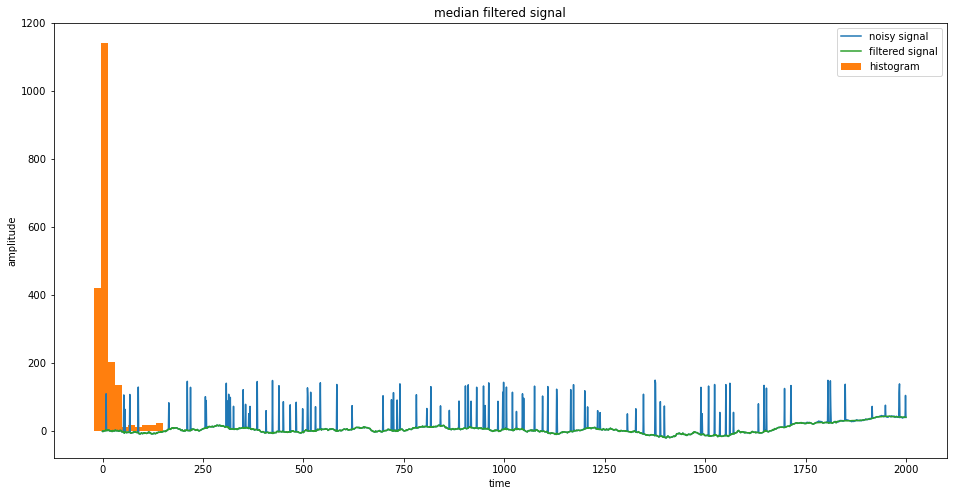

In [25]:
# create signal
n = 2000
signal = np.cumsum(np.random.randn(n))

# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50+np.random.rand(len(noisepnts))*100

fig3=plt.figure(3, figsize = (16, 8))
plt.plot(range(0,n),signal, label='noisy signal')

### TODO: plot hist to pick threshold ###
plt.hist(signal, label='histogram')


### TODO: visual-picked threshold ###
threshold = 25


### TODO: find data values above the threshold ###
suprathresh = np.where(signal > threshold)[0]


# initialize filtered signal
filtsig = copy.deepcopy(signal)
print(filtsig[0])

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for ti in suprathresh:
    if (ti < 20):
        filtsig[ti] = np.median(signal[0:ti+k])
    elif (ti >= 20 and ti <= len(signal)-k-1):
        filtsig[ti] = np.median(signal[ti-k:ti+k])
    else:
        filtsig[ti] = np.median(signal[ti-k:len(signal1)])
    
    

# fig = plt.figure(1, figsize = (16, 8))


plt.plot(range(0,n), filtsig, label='filtered signal')

plt.title('median filtered signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend(loc='upper right')

## Discussion

**Compare the mean and median filters in terms of their uses and one advantage and disadvantage one has over the other.**

The advantage of using a median filter over a mean filter is that extreme values from noise won't negatively affect the filtered signal in a significant way. However, using a median filter throws away information that could be needed, depending on the situation. As for a mean filter, the advantage of using that would be that all information is accounted for when calculating a mean, so no information is thrown away. However, a drawback of using a mean filter is that extreme outliers from noise have the ability to influence the filtered signal in inaccurate ways. 

## Denoising an EMG signal

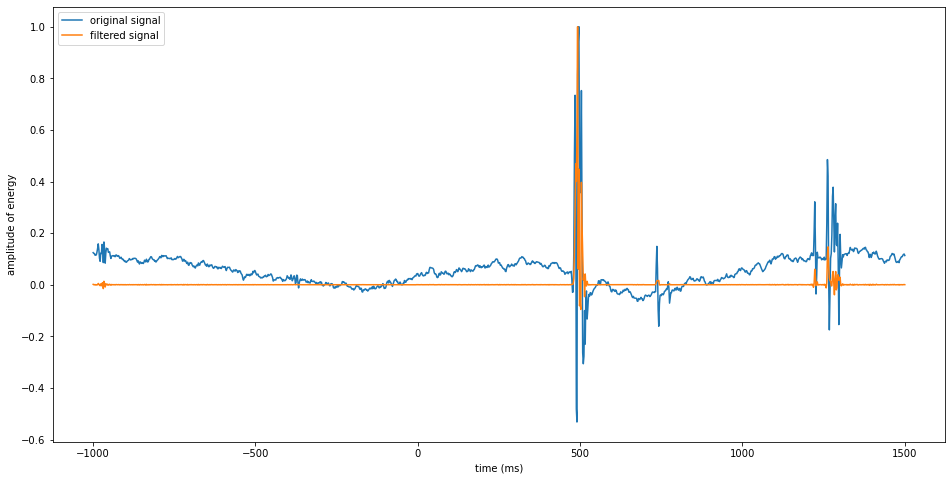

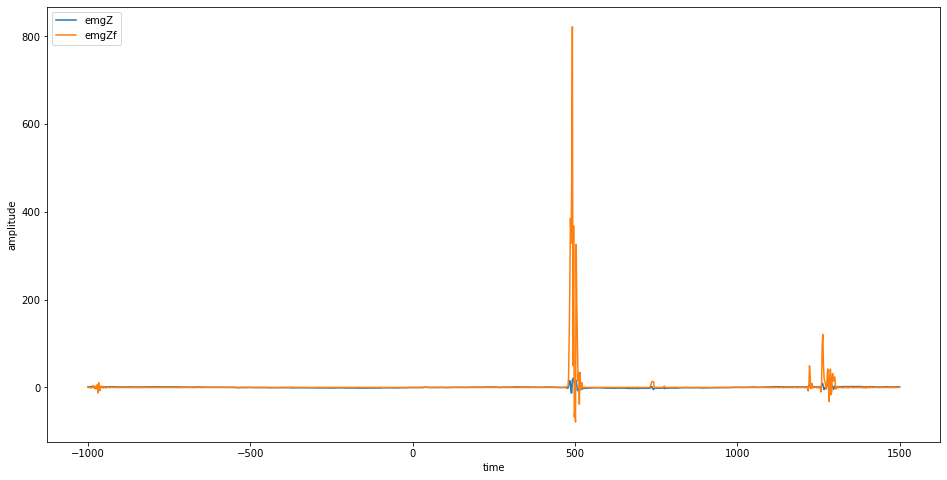

In [50]:
# import data
emgdata = scipy.io.loadmat('EMG.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]

# initialize filtered signal
emgf = copy.deepcopy(emg) # this is where the result of the TKEO algorithm should be stored

# apply the TKEO algorithm

for t in range(0, len(emgtime)):
    if (t != (0 or len(emgtime) - 1)):
        emgf[t] = emg[t]**2 - emg[t-1]*emg[t+1]
        



### TODO: convert both signals to zscore ###

# find timepoint zero

#np.argmin() can come in handy
time0 = np.argmin(np.abs(emgtime))

# convert original EMG to z-score from time-zero

### TODO: subtract the mean of the emg signal from 0 to time0 from the original emg ###
emgZ = emg - emg[:time0].mean()
# and divide that by the standard deviation of the signal from 0 to time0
emgZ = emgZ / np.std(emg[:time0])
# same for filtered EMG energy

### TODO: Repeat for the filtered signal ###
emgZf = emgf - emgf[:time0].mean()
emgZf = emgZf / np.std(emgf[:time0])


### TODO: plot your results as directed ###
scale1 = emg/np.max(emg)
scale2 = emgf/np.max(emgf)
fig0 = plt.figure(1, figsize = (16, 8))
plt.plot(emgtime, scale1, label='original signal')
plt.plot(emgtime, scale2, label='filtered signal')

plt.xlabel('time (ms)')
plt.ylabel('amplitude of energy')
plt.legend(loc='upper left')

########################################

fig = plt.figure(2, figsize = (16, 8))
plt.plot(emgtime, emgZ, label='emgZ')

plt.xlabel('time')
plt.ylabel('amplitude')

plt.plot(emgtime, emgZf, label='emgZf')

plt.legend(loc='upper left')

## Discussion

**How would the other two filters implemented, i.e, the running mean and median filters fare against the TKEO method in analysing the EMG signal in this fashion?**



**If you had to use a running mean filter or a median filter to analyse the EMG signal to detect muscle activity, which one would you prefer and why?**



The other two filters implemented would not have performed as well as the TKEO method for the EMG signal. Both of them would distort the signal in a way that would make it harder to see spikes in the data, making them much smaller.

If I had to pick one of the two, I would use the mean filter because it wouldn't ignore any data from the data set and would show better spikes than the median filter. 